In [1]:
import database
from dataset import Dataset
from ae_test import AutoencoderTest
import torch.optim as optim
import torch
from tqdm import tqdm_notebook
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def show_stat(arr):
    print('{:.3f}±{:.3f}'.format(np.mean(arr), np.std(arr)))

In [3]:
def distance(data, eps=1e-8):
    n = data.shape[0]
    distance_matrix = []
    data = data.to(data.device)
    for i in tqdm_notebook(range(n)):
        dist = data - data[i:i+1].repeat(n, 1)
        dist = dist.pow(2).sum(1)
        dist = (dist+eps).sqrt()
        dist[i] = 0
        distance_matrix.append(dist)
    distance_matrix = torch.cat(distance_matrix,0).view(n,n)
    distance_matrix = distance_matrix.cpu()
    mask = torch.ones(n,n)
    mask = torch.triu(mask,diagonal=1)
    mean = distance_matrix[mask>0].mean()
#     print("######:", mean)
    distance_matrix[mask>0] = distance_matrix[mask>0]/mean
    return distance_matrix[mask>0]

In [4]:
device = torch.device('cuda')
BATCH_SIZE = 64
LEARNING_RATE = 1e-3

In [5]:
db = database.DEFAULT_DB()
db.setUp()

In [6]:
def experiment(train_dataset_name, test_dataset_name, all_level, col=None ):
    # load training data
    dataset = Dataset(db, train_dataset_name)
    if col is not None:
        dataset.set_columns(col)
    dataset.load(BATCH_SIZE, 1, 1, all_level=all_level)
    
    MAX_EPOCH = 2000 // len(dataset.dataloader) + 1
    INPUT_DIM = len(dataset.columns)
    
    # define network
    model = AutoencoderTest(input_dim=INPUT_DIM, lw=1).to(device)
    optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)
    
    # training
    for epoch in tqdm_notebook(range(MAX_EPOCH)):
        for data in dataset.dataloader:
            input_data, output_data = data[:, :INPUT_DIM], data[:, INPUT_DIM:]
            input_data = input_data.to(device)
            output_data = output_data.to(device)
            optimizer.zero_grad()
            _, loss, _ = model.loss(input_data, output_data, dataset.mean)
            loss.backward()
            optimizer.step()
            
    # load test_data
    test_dataset = Dataset(db, test_dataset_name)
    if col is not None:
        test_dataset.set_columns(col)
    
#     test_dataset.load(BATCH_SIZE, 1, 1, normalizer=dataset.normalizer)
#     test_data = test_dataset.dataloader.dataset[:, :INPUT_DIM]
    test_data = test_dataset.load_day(dataset.normalizer)
    
    # inference
    test_z = model(test_data.to(device))
    
    xd = distance(data=test_data.detach().cpu())
    zd = distance(data=test_z.detach().cpu())
    loss_n = F.mse_loss(xd,zd)
    print("dist loss:",loss_n)
    return loss_n

In [7]:
arr11 = []
arr22 = []
arr12 = []
arr21 = []
arr01 = []
arr02 = []

In [8]:
for i in tqdm_notebook(range(30)):
#     arr12.append(experiment('mrt_in_hour_eng_abbr1108', 'mrt_in_hour_eng_abbr0801'))
#     arr02.append(experiment('mrt_in_hour_eng_abbr', 'mrt_in_hour_eng_abbr0801'))
    
    arr12.append(experiment('mrt_in_hour_eng_abbr', 'mrt_in_hour_eng_abbr', all_level=True))
    arr02.append(experiment('mrt_in_hour_eng_abbr', 'mrt_in_hour_eng_abbr', all_level=False))

new dataset: mrt_in_hour_eng_abbr
##################total train_dataset
input_dim: 108


new dataset: mrt_in_hour_eng_abbr


dist loss: tensor(0.1025)
new dataset: mrt_in_hour_eng_abbr
input_dim: 108


new dataset: mrt_in_hour_eng_abbr


dist loss: tensor(0.1169)
new dataset: mrt_in_hour_eng_abbr
##################total train_dataset
input_dim: 108


new dataset: mrt_in_hour_eng_abbr


dist loss: tensor(0.1171)
new dataset: mrt_in_hour_eng_abbr
input_dim: 108


new dataset: mrt_in_hour_eng_abbr


dist loss: tensor(0.1832)
new dataset: mrt_in_hour_eng_abbr
##################total train_dataset
input_dim: 108


new dataset: mrt_in_hour_eng_abbr


dist loss: tensor(0.0971)
new dataset: mrt_in_hour_eng_abbr
input_dim: 108


new dataset: mrt_in_hour_eng_abbr


dist loss: tensor(0.1066)
new dataset: mrt_in_hour_eng_abbr
##################total train_dataset
input_dim: 108


new dataset: mrt_in_hour_eng_abbr


dist loss: tensor(0.1047)
new dataset: mrt_in_hour_eng_abbr
input_dim: 108


new dataset: mrt_in_hour_eng_abbr


dist loss: tensor(0.1182)
new dataset: mrt_in_hour_eng_abbr
##################total train_dataset
input_dim: 108


new dataset: mrt_in_hour_eng_abbr


dist loss: tensor(0.1330)
new dataset: mrt_in_hour_eng_abbr
input_dim: 108


new dataset: mrt_in_hour_eng_abbr


dist loss: tensor(0.1009)
new dataset: mrt_in_hour_eng_abbr
##################total train_dataset
input_dim: 108


new dataset: mrt_in_hour_eng_abbr


dist loss: tensor(0.1150)
new dataset: mrt_in_hour_eng_abbr
input_dim: 108


new dataset: mrt_in_hour_eng_abbr


dist loss: tensor(0.1289)
new dataset: mrt_in_hour_eng_abbr
##################total train_dataset
input_dim: 108


new dataset: mrt_in_hour_eng_abbr


dist loss: tensor(0.1128)
new dataset: mrt_in_hour_eng_abbr
input_dim: 108


new dataset: mrt_in_hour_eng_abbr


dist loss: tensor(0.2172)
new dataset: mrt_in_hour_eng_abbr
##################total train_dataset
input_dim: 108


new dataset: mrt_in_hour_eng_abbr


dist loss: tensor(0.1239)
new dataset: mrt_in_hour_eng_abbr
input_dim: 108


new dataset: mrt_in_hour_eng_abbr


dist loss: tensor(0.1808)
new dataset: mrt_in_hour_eng_abbr
##################total train_dataset
input_dim: 108


new dataset: mrt_in_hour_eng_abbr


dist loss: tensor(0.1325)
new dataset: mrt_in_hour_eng_abbr
input_dim: 108


new dataset: mrt_in_hour_eng_abbr


dist loss: tensor(0.1147)
new dataset: mrt_in_hour_eng_abbr
##################total train_dataset
input_dim: 108


new dataset: mrt_in_hour_eng_abbr


dist loss: tensor(0.1179)
new dataset: mrt_in_hour_eng_abbr
input_dim: 108


new dataset: mrt_in_hour_eng_abbr


dist loss: tensor(0.1227)
new dataset: mrt_in_hour_eng_abbr
##################total train_dataset
input_dim: 108


new dataset: mrt_in_hour_eng_abbr


dist loss: tensor(0.1336)
new dataset: mrt_in_hour_eng_abbr
input_dim: 108


new dataset: mrt_in_hour_eng_abbr


dist loss: tensor(0.1448)
new dataset: mrt_in_hour_eng_abbr
##################total train_dataset
input_dim: 108


new dataset: mrt_in_hour_eng_abbr


dist loss: tensor(0.1791)
new dataset: mrt_in_hour_eng_abbr
input_dim: 108


new dataset: mrt_in_hour_eng_abbr


dist loss: tensor(0.0848)
new dataset: mrt_in_hour_eng_abbr
##################total train_dataset
input_dim: 108


new dataset: mrt_in_hour_eng_abbr


dist loss: tensor(0.1541)
new dataset: mrt_in_hour_eng_abbr
input_dim: 108


new dataset: mrt_in_hour_eng_abbr


dist loss: tensor(0.0991)
new dataset: mrt_in_hour_eng_abbr
##################total train_dataset
input_dim: 108


new dataset: mrt_in_hour_eng_abbr


dist loss: tensor(0.0985)
new dataset: mrt_in_hour_eng_abbr
input_dim: 108


new dataset: mrt_in_hour_eng_abbr


dist loss: tensor(0.1391)
new dataset: mrt_in_hour_eng_abbr
##################total train_dataset
input_dim: 108


new dataset: mrt_in_hour_eng_abbr


dist loss: tensor(0.1255)
new dataset: mrt_in_hour_eng_abbr
input_dim: 108


new dataset: mrt_in_hour_eng_abbr


dist loss: tensor(0.0951)
new dataset: mrt_in_hour_eng_abbr
##################total train_dataset
input_dim: 108


new dataset: mrt_in_hour_eng_abbr


dist loss: tensor(0.1166)
new dataset: mrt_in_hour_eng_abbr
input_dim: 108


new dataset: mrt_in_hour_eng_abbr


dist loss: tensor(0.1177)
new dataset: mrt_in_hour_eng_abbr
##################total train_dataset
input_dim: 108


new dataset: mrt_in_hour_eng_abbr


dist loss: tensor(0.1585)
new dataset: mrt_in_hour_eng_abbr
input_dim: 108


new dataset: mrt_in_hour_eng_abbr


dist loss: tensor(0.1103)
new dataset: mrt_in_hour_eng_abbr
##################total train_dataset
input_dim: 108


new dataset: mrt_in_hour_eng_abbr


dist loss: tensor(0.1307)
new dataset: mrt_in_hour_eng_abbr
input_dim: 108


new dataset: mrt_in_hour_eng_abbr


dist loss: tensor(0.1242)
new dataset: mrt_in_hour_eng_abbr
##################total train_dataset
input_dim: 108


new dataset: mrt_in_hour_eng_abbr


dist loss: tensor(0.1246)
new dataset: mrt_in_hour_eng_abbr
input_dim: 108


new dataset: mrt_in_hour_eng_abbr


dist loss: tensor(0.1108)
new dataset: mrt_in_hour_eng_abbr
##################total train_dataset
input_dim: 108


new dataset: mrt_in_hour_eng_abbr


dist loss: tensor(0.1089)
new dataset: mrt_in_hour_eng_abbr
input_dim: 108


new dataset: mrt_in_hour_eng_abbr


dist loss: tensor(0.1278)
new dataset: mrt_in_hour_eng_abbr
##################total train_dataset
input_dim: 108


new dataset: mrt_in_hour_eng_abbr


dist loss: tensor(0.1177)
new dataset: mrt_in_hour_eng_abbr
input_dim: 108


new dataset: mrt_in_hour_eng_abbr


dist loss: tensor(0.1216)
new dataset: mrt_in_hour_eng_abbr
##################total train_dataset
input_dim: 108


new dataset: mrt_in_hour_eng_abbr


dist loss: tensor(0.1137)
new dataset: mrt_in_hour_eng_abbr
input_dim: 108


new dataset: mrt_in_hour_eng_abbr


dist loss: tensor(0.0741)
new dataset: mrt_in_hour_eng_abbr
##################total train_dataset
input_dim: 108


new dataset: mrt_in_hour_eng_abbr


dist loss: tensor(0.1412)
new dataset: mrt_in_hour_eng_abbr
input_dim: 108


new dataset: mrt_in_hour_eng_abbr


dist loss: tensor(0.1360)
new dataset: mrt_in_hour_eng_abbr
##################total train_dataset
input_dim: 108


new dataset: mrt_in_hour_eng_abbr


dist loss: tensor(0.0933)
new dataset: mrt_in_hour_eng_abbr
input_dim: 108


new dataset: mrt_in_hour_eng_abbr


dist loss: tensor(0.1400)
new dataset: mrt_in_hour_eng_abbr
##################total train_dataset
input_dim: 108


new dataset: mrt_in_hour_eng_abbr


dist loss: tensor(0.1239)
new dataset: mrt_in_hour_eng_abbr
input_dim: 108


new dataset: mrt_in_hour_eng_abbr


dist loss: tensor(0.0834)
new dataset: mrt_in_hour_eng_abbr
##################total train_dataset
input_dim: 108


new dataset: mrt_in_hour_eng_abbr


dist loss: tensor(0.1321)
new dataset: mrt_in_hour_eng_abbr
input_dim: 108


new dataset: mrt_in_hour_eng_abbr


dist loss: tensor(0.1385)
new dataset: mrt_in_hour_eng_abbr
##################total train_dataset
input_dim: 108


new dataset: mrt_in_hour_eng_abbr


dist loss: tensor(0.1977)
new dataset: mrt_in_hour_eng_abbr
input_dim: 108


new dataset: mrt_in_hour_eng_abbr


dist loss: tensor(0.0917)
new dataset: mrt_in_hour_eng_abbr
##################total train_dataset
input_dim: 108


new dataset: mrt_in_hour_eng_abbr


dist loss: tensor(0.1044)
new dataset: mrt_in_hour_eng_abbr
input_dim: 108


new dataset: mrt_in_hour_eng_abbr


dist loss: tensor(0.1133)
new dataset: mrt_in_hour_eng_abbr
##################total train_dataset
input_dim: 108


new dataset: mrt_in_hour_eng_abbr


dist loss: tensor(0.1330)
new dataset: mrt_in_hour_eng_abbr
input_dim: 108


new dataset: mrt_in_hour_eng_abbr


dist loss: tensor(0.1238)
new dataset: mrt_in_hour_eng_abbr
##################total train_dataset
input_dim: 108


new dataset: mrt_in_hour_eng_abbr


dist loss: tensor(0.1537)
new dataset: mrt_in_hour_eng_abbr
input_dim: 108


new dataset: mrt_in_hour_eng_abbr


dist loss: tensor(0.1246)



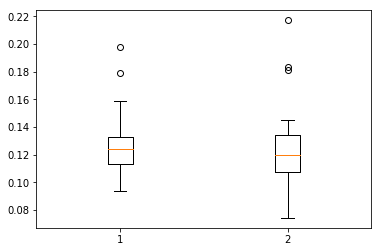

0.127±0.023
0.123±0.030


In [9]:
plt.boxplot([arr12,arr02])
plt.show()
show_stat(arr12)
show_stat(arr02)

In [12]:
arr12 = []
arr02 = []
cur_col = [
    'temp','hum','windspeed','casual','registered','cnt'
]
for i in tqdm_notebook(range(30)):
#     arr12.append(experiment('bike_sharing_2011', 'bike_sharing_2012', cur_col))
#     arr02.append(experiment('bike_sharing', 'bike_sharing_2012', cur_col))
    arr12.append(experiment('bike_sharing', 'bike_sharing', all_level=True, col=cur_col))
    arr02.append(experiment('bike_sharing', 'bike_sharing', all_level=False, col=cur_col))

new dataset: bike_sharing
##################total train_dataset
input_dim: 6


new dataset: bike_sharing


dist loss: tensor(0.1074)
new dataset: bike_sharing
input_dim: 6


new dataset: bike_sharing


dist loss: tensor(0.1335)
new dataset: bike_sharing
##################total train_dataset
input_dim: 6


new dataset: bike_sharing


dist loss: tensor(0.0826)
new dataset: bike_sharing
input_dim: 6


new dataset: bike_sharing


dist loss: tensor(0.1107)
new dataset: bike_sharing
##################total train_dataset
input_dim: 6


new dataset: bike_sharing


dist loss: tensor(0.0850)
new dataset: bike_sharing
input_dim: 6


new dataset: bike_sharing


dist loss: tensor(0.1275)
new dataset: bike_sharing
##################total train_dataset
input_dim: 6


new dataset: bike_sharing


dist loss: tensor(0.1699)
new dataset: bike_sharing
input_dim: 6


new dataset: bike_sharing


dist loss: tensor(0.2290)
new dataset: bike_sharing
##################total train_dataset
input_dim: 6


new dataset: bike_sharing


dist loss: tensor(0.2031)
new dataset: bike_sharing
input_dim: 6


new dataset: bike_sharing


dist loss: tensor(0.2280)
new dataset: bike_sharing
##################total train_dataset
input_dim: 6


new dataset: bike_sharing


dist loss: tensor(0.0734)
new dataset: bike_sharing
input_dim: 6


new dataset: bike_sharing


dist loss: tensor(0.1795)
new dataset: bike_sharing
##################total train_dataset
input_dim: 6


new dataset: bike_sharing


dist loss: tensor(0.0995)
new dataset: bike_sharing
input_dim: 6


new dataset: bike_sharing


dist loss: tensor(0.0448)
new dataset: bike_sharing
##################total train_dataset
input_dim: 6


new dataset: bike_sharing


dist loss: tensor(0.0930)
new dataset: bike_sharing
input_dim: 6


new dataset: bike_sharing


dist loss: tensor(0.0660)
new dataset: bike_sharing
##################total train_dataset
input_dim: 6


new dataset: bike_sharing


dist loss: tensor(0.0643)
new dataset: bike_sharing
input_dim: 6


new dataset: bike_sharing


dist loss: tensor(0.0600)
new dataset: bike_sharing
##################total train_dataset
input_dim: 6


new dataset: bike_sharing


dist loss: tensor(0.1617)
new dataset: bike_sharing
input_dim: 6


new dataset: bike_sharing


dist loss: tensor(0.2422)
new dataset: bike_sharing
##################total train_dataset
input_dim: 6


new dataset: bike_sharing


dist loss: tensor(0.1073)
new dataset: bike_sharing
input_dim: 6


new dataset: bike_sharing


dist loss: tensor(0.0616)
new dataset: bike_sharing
##################total train_dataset
input_dim: 6


new dataset: bike_sharing


dist loss: tensor(0.0880)
new dataset: bike_sharing
input_dim: 6


new dataset: bike_sharing


dist loss: tensor(0.0946)
new dataset: bike_sharing
##################total train_dataset
input_dim: 6


new dataset: bike_sharing


dist loss: tensor(0.1492)
new dataset: bike_sharing
input_dim: 6


new dataset: bike_sharing


dist loss: tensor(0.1395)
new dataset: bike_sharing
##################total train_dataset
input_dim: 6


new dataset: bike_sharing


dist loss: tensor(0.0607)
new dataset: bike_sharing
input_dim: 6


new dataset: bike_sharing


dist loss: tensor(0.1684)
new dataset: bike_sharing
##################total train_dataset
input_dim: 6


new dataset: bike_sharing


dist loss: tensor(0.1362)
new dataset: bike_sharing
input_dim: 6


new dataset: bike_sharing


dist loss: tensor(0.0733)
new dataset: bike_sharing
##################total train_dataset
input_dim: 6


new dataset: bike_sharing


dist loss: tensor(0.0891)
new dataset: bike_sharing
input_dim: 6


new dataset: bike_sharing


dist loss: tensor(0.2196)
new dataset: bike_sharing
##################total train_dataset
input_dim: 6


new dataset: bike_sharing


dist loss: tensor(0.0700)
new dataset: bike_sharing
input_dim: 6


new dataset: bike_sharing


dist loss: tensor(0.1477)
new dataset: bike_sharing
##################total train_dataset
input_dim: 6


new dataset: bike_sharing


dist loss: tensor(0.1067)
new dataset: bike_sharing
input_dim: 6


new dataset: bike_sharing


dist loss: tensor(0.0660)
new dataset: bike_sharing
##################total train_dataset
input_dim: 6


new dataset: bike_sharing


dist loss: tensor(0.2099)
new dataset: bike_sharing
input_dim: 6


new dataset: bike_sharing


dist loss: tensor(0.1441)
new dataset: bike_sharing
##################total train_dataset
input_dim: 6


new dataset: bike_sharing


dist loss: tensor(0.1723)
new dataset: bike_sharing
input_dim: 6


new dataset: bike_sharing


dist loss: tensor(0.0848)
new dataset: bike_sharing
##################total train_dataset
input_dim: 6


new dataset: bike_sharing


dist loss: tensor(0.0862)
new dataset: bike_sharing
input_dim: 6


new dataset: bike_sharing


dist loss: tensor(0.2370)
new dataset: bike_sharing
##################total train_dataset
input_dim: 6


new dataset: bike_sharing


dist loss: tensor(0.1376)
new dataset: bike_sharing
input_dim: 6


new dataset: bike_sharing


dist loss: tensor(0.0503)
new dataset: bike_sharing
##################total train_dataset
input_dim: 6


new dataset: bike_sharing


dist loss: tensor(0.0798)
new dataset: bike_sharing
input_dim: 6


new dataset: bike_sharing


dist loss: tensor(0.1494)
new dataset: bike_sharing
##################total train_dataset
input_dim: 6


new dataset: bike_sharing


dist loss: tensor(0.0966)
new dataset: bike_sharing
input_dim: 6


new dataset: bike_sharing


dist loss: tensor(0.0535)
new dataset: bike_sharing
##################total train_dataset
input_dim: 6


new dataset: bike_sharing


dist loss: tensor(0.1495)
new dataset: bike_sharing
input_dim: 6


new dataset: bike_sharing


dist loss: tensor(0.1390)
new dataset: bike_sharing
##################total train_dataset
input_dim: 6


new dataset: bike_sharing


dist loss: tensor(0.2162)
new dataset: bike_sharing
input_dim: 6


new dataset: bike_sharing


dist loss: tensor(0.1776)
new dataset: bike_sharing
##################total train_dataset
input_dim: 6


new dataset: bike_sharing


dist loss: tensor(0.1755)
new dataset: bike_sharing
input_dim: 6


new dataset: bike_sharing


dist loss: tensor(0.0688)
new dataset: bike_sharing
##################total train_dataset
input_dim: 6


new dataset: bike_sharing


dist loss: tensor(0.1325)
new dataset: bike_sharing
input_dim: 6


new dataset: bike_sharing


dist loss: tensor(0.1568)
new dataset: bike_sharing
##################total train_dataset
input_dim: 6


new dataset: bike_sharing


dist loss: tensor(0.1044)
new dataset: bike_sharing
input_dim: 6


new dataset: bike_sharing


dist loss: tensor(0.0566)
new dataset: bike_sharing
##################total train_dataset
input_dim: 6


new dataset: bike_sharing


dist loss: tensor(0.0717)
new dataset: bike_sharing
input_dim: 6


new dataset: bike_sharing


dist loss: tensor(0.0593)



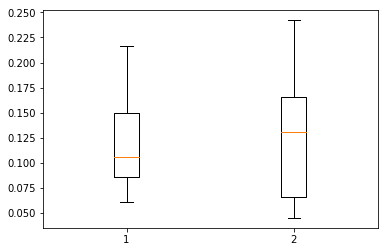

0.119±0.045
0.126±0.062


In [13]:
plt.boxplot([arr12,arr02])
plt.show()
show_stat(arr12)
show_stat(arr02)

In [ ]:
arr12 = []
arr02 = []
cur_col = [
    'PP','LDPE','HDPE','EG_contract','EG_OUCC','PVC','SM_GPPC','VCM','Butadiene','Nylons',
    'SM_US_contract','WTI_Futures','SM_US','DubaiCrudeOil','BrentOilFutures','BrentOil','WTI','Ethyl_acetate','Isopropanol','Singapore_RSS3'
]
for i in tqdm_notebook(range(30)):
    arr12.append(experiment('plastics_and_chemicals_en_0713', 'plastics_and_chemicals_en1318', cur_col))
    arr02.append(experiment('plastics_and_chemicals_en', 'plastics_and_chemicals_en1318', cur_col))

In [ ]:
plt.boxplot([arr12,arr02])
plt.show()
show_stat(arr12)
show_stat(arr02)

In [ ]:
show_stat(arr12)
show_stat(arr02)

In [ ]:
arr12 = []
arr02 = []
cur_col = [
    'temp','hum','windspeed','casual','registered','cnt'
]
for i in tqdm_notebook(range(30)):
    arr12.append(experiment('bike_sharing_2011', 'bike_sharing_2012', cur_col))
    arr02.append(experiment('bike_sharing', 'bike_sharing_2012', cur_col))

In [ ]:
plt.boxplot([arr12,arr02])
plt.show()
show_stat(arr12)
show_stat(arr02)

In [ ]:
# cur_col = [
#     'PP','LDPE','HDPE','EG_contract','EG_OUCC','PVC','SM_GPPC','VCM','Butadiene','Nylons',
#     'SM_US_contract','WTI_Futures','SM_US','DubaiCrudeOil','BrentOilFutures','BrentOil','WTI','Ethyl_acetate','Isopropanol','Singapore_RSS3'
# ]
# # experiment('plastics_and_chemicals_en_0713', 'plastics_and_chemicals_en_0713', cur_col)
# experiment('plastics_and_chemicals_en1318', 'plastics_and_chemicals_en1318', cur_col)


# experiment('plastics_and_chemicals_en_0713', 'plastics_and_chemicals_en1318', cur_col)
# experiment('plastics_and_chemicals_en1318', 'plastics_and_chemicals_en_0713', cur_col)

# experiment('plastics_and_chemicals_en', 'plastics_and_chemicals_en1318', cur_col)
# experiment('plastics_and_chemicals_en', 'plastics_and_chemicals_en_0713', cur_col)

In [ ]:
# cur_col = [
#     'temp','hum','windspeed','casual','registered','cnt'
# ]
# experiment('bike_sharing_2011', 'bike_sharing_2011', cur_col)
# experiment('bike_sharing_2012', 'bike_sharing_2012', cur_col)
           
# experiment('bike_sharing_2011', 'bike_sharing_2012', cur_col)
# experiment('bike_sharing_2012', 'bike_sharing_2011', cur_col)
           
# experiment('bike_sharing', 'bike_sharing_2012', cur_col)
# experiment('bike_sharing', 'bike_sharing_2011', cur_col)